<a href="https://www.kaggle.com/code/experience08/loan-prediction?scriptVersionId=246086677" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eligibility-prediction-for-loan/Loan_Data.csv


# Importing libraries

In [2]:

import pandas as pd 
import numpy as np
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Load the data

In [3]:
#Display the top 5 columns
Loan_data=pd.read_csv('/kaggle/input/eligibility-prediction-for-loan/Loan_Data.csv')
Loan_data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Exploratory Data Analysis

### Summary of the data 

In [4]:
Loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Statistically description of the dataset

In [5]:
Loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Checking for null values

In [6]:
Loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Dropping null values

In [7]:
New_data=Loan_data.dropna()
# Cheching to see if there are still missing values
New_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Label encoding

In [8]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

# List of columns to label encode
cols_to_encode = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
                  'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
                  'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

# Apply label encoding to each column individually
for col in cols_to_encode:
    New_data.loc[:, col] = label_encoder.fit_transform(New_data[col].astype(str))




In [9]:
#Displaying the columns we have
New_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
New_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


#  Features and Target Selection

In [11]:
# Feature selection
Features=['Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',]

In [12]:
X=New_data[Features]
X.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,0,0,285,35.0,28.0,5.0,1.0,0
2,1,0,0,1,146,0.0,160.0,5.0,1.0,2
3,1,0,1,0,108,123.0,20.0,5.0,1.0,2
4,0,0,0,0,343,0.0,41.0,5.0,1.0,2
5,1,2,0,1,319,187.0,114.0,5.0,1.0,2


In [13]:
y = New_data.Loan_Status
y.head()

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status, dtype: object

In [14]:
print(type(y))

<class 'pandas.core.series.Series'>


In [15]:
le = LabelEncoder()
y = le.fit_transform(y.astype(str))

## Handle class imbalance with SMOTE


In [16]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Split data into training and testing data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


# Train RandomForest model

In [18]:
Loan_Prediction_Model = RandomForestClassifier(n_estimators=100, random_state=42)

### Fitting the model 

In [19]:
Loan_Prediction_Model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# Predictions and Evaluation

In [20]:
y_pred= Loan_Prediction_Model.predict(X_test)


In [21]:
y_proba = Loan_Prediction_Model.predict_proba(X_test)[:, 1]

### Accuracy score

In [22]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.84


In [23]:
auc = roc_auc_score(y_test, y_proba)
print(f'ROC-AUC: {auc:.2f}')



ROC-AUC: 0.88


### Classification report

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83        65
           1       0.81      0.90      0.85        68

    accuracy                           0.84       133
   macro avg       0.85      0.84      0.84       133
weighted avg       0.85      0.84      0.84       133



### Confusion matrix

In [25]:
confusion_m =confusion_matrix(y_test, y_pred)
confusion_m

array([[51, 14],
       [ 7, 61]])

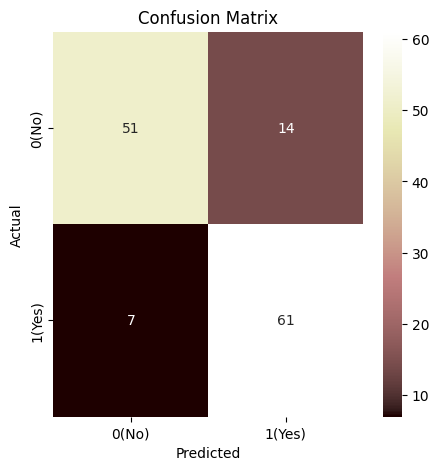

In [26]:
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_m, 
            annot=True, 
            fmt='d', 
            cmap='pink',
            xticklabels=['0(No)', '1(Yes)'],
            yticklabels=['0(No)', '1(Yes)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Save the model

In [27]:
import joblib
joblib.dump(Loan_Prediction_Model, "loan_approval_model.pkl")


['loan_approval_model.pkl']

In [28]:
#Testing using new data
new_data=(1,0,1,0,7500,2500,150,6,0,1)

# changing the input_data to numpy array
new_data_as_numpy_array = np.asarray(new_data)

# reshape the array as we are predicting for one instance
new_data_reshaped = new_data_as_numpy_array.reshape(1,-1)

prediction = Loan_Prediction_Model.predict(new_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('You do not qualify for a loan')
else:
  print('you qualify for a loan')

[0]
You do not qualify for a loan


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
